# Introduction à la Science des données


## Travail pratique 05 – Régression linéaire

### Table des matières

[Exercice 1: Analyse Exploratoire des Données](##-Exercice-1:-Analyse-Exploratoire-des-Données)

- [1.1 Récupération des données](#1.1-Récupération-des-données)

- [1.2 Nettoyage des données](#1.2-Nettoyage-des-données)

- [1.3 Interprétation et analyse des graphiques](#1.3-Interprétation-et-analyse-des-graphiques)

[Exercice 2: Régression linéaire simple](#Exercice-2:-Régression-linéaire-simple)

[Exercice 3: Régression linéaire multiple](#Exercice-3:-Régression-linéaire-multiple)

***
Professeurs: Carlos Peña et Stephan Robert

Assistant(s): Thibault Schowing et Xavier Brochet

Rendu:
- Date: 15.01.2023, 23h55 (3 (+2) semaines)


- Modalité: Une fois complété, rendez directement ce notebook modifié et renommé correctement comme suit "**TP5_ISD_SA2022_Nom1_Nom2.ipynb**" en remplaçant Nom1 et Nom2 (et ajouter Nom3 si nécessaire) par vos noms de famille respectifs puis uploadez votre fichier sur Cyberlearn.
- Complétez également vos prénoms et noms ci-dessous.
- Les questions sont généralement indiquées en **gras**, en bleu ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 
- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre.

Note: 
- Ce TP est noté sur 6, pour un poids de 25%

Étudiant(s):

- Calvin Graf
- Christopher Brodo
- 

<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Effectuer une analyse exploratoire des données 
- À l'aide de l'algorithme vu en cours, réaliser une régression linéaire simple 
- À l'aide de la librairie scikit-learn, réaliser une régression linéaire multiple
- Analyser et expliquer les résultats obtenus

<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>

<div class="alert alert-block alert-info">
<b>Points: </b> Le TP est noté sur 55 points (les exercices, 4 points pour le rendu, 2 points pour la propreté générale). En cas de retard, les pénalités varient entre 1 et 15 points, ou jusqu'à la non-correction du TP. 
</div>


In [154]:
# Importation des packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

# Différents moyens de standardiser les données mis à disposition par Scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

## Exercice 1: Analyse Exploratoire des Données

### 1.1 Récupération des données

Comme vous avez pu en voir au cours des précédents travaux pratiques, une certaine quantité de datasets publics sont régulièrement utilisés comme base d'apprentissage pour la science des données. Dans ce TP nous utiliserons le dataset connu sous le nom de "California Housing Dataset" qu'il est possible d'obtenir [ici via scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). Scikit-learn fournit une rapide analyse exploratoire qui a été copiée en partie ci-dessous. 

**Exécutez les cellules ci-dessous en lisant attentivement le code et les commentaires et répondez aux questions qui suivent.**

In [155]:
# On importe la fonction fetch_california_housing

from sklearn.datasets import fetch_california_housing

# Et on l'utilise. 
# l'option "as_frame" permet d'obtenir directement un DataFrame dans le dictionnaire.
# Sans cela, l'élément "frame" serait absent du dictionnaire ci-dessous.
# Les différents éléments du dictionnaire (Data, Target, DESCR, noms de colonnes, etc) sont dès lors directement accessibles

california_housing = fetch_california_housing(as_frame=True) 

In [156]:
# Observez ce que contient la variable california_housing
california_housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [157]:
# Étant donné qu'il s'agit d'un dictionnaire, on peut regarder les clés et leur contenu (affiché ci-dessus)
#california_housing.keys()
california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

### Question

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Que contiennent les clés <i>'data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'</i> obtenues ci-dessus ? Donnez une rapide description des différents éléments sous forme de liste à puces. Une ligne par élément suffit.</p>

(5 points)





___
*Réponse:* 

- data : Donne les infos contenues dans la base de données (n'inclus pas "MedHouseVal"

- target : Contient la valeur médiane des maisons pour chaque district.

- frame : Donne TOUTES les infos contenues dans la base de donnée.

- target_names : Contient le nom de la colonne de target

- feature_names : Contient le nom des colonnes de data mais pas celle de target

- DESCR : Donne une description de ce qu'est la base de données et explique chacune de ses colonnes
___

En utilisant print(), on peut afficher de manière plus lisible l'élément "DESCR" du dictionnaire. 

*(car **print()** va interpréter les caractères spéciaux comme '\n' -> retour à la ligne)*

In [158]:
print(california_housing["DESCR"])

# Aussi accessible en utilisant cette notation: 
#print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

En accédant à l'élément *frame*, on peut commencer à travailler comme d'habitude. 

Observons rapidement nos données:

In [159]:
# Les 5 premières observations
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C'est un peu long à écrire "california_housing.frame". Affectons ça à notre variable "df" habituelle, ou plutôt "df_raw" car nous allons encore un peu le modifier (preprocessing) avant d'en avoir une version finale. **Attention, petit rappel: si vous exécutez une autre affectation à une variable "df" dans un autre notebook qui tourne avec le même kernel, il faudra réafecter la variable ici. Vous pouvez à tout moment exécuter "cell > run All" pour tout réexécuter. Suivant le contenu cela peut prendre du temps par contre !**

In [160]:
# Données brutes
df_raw = california_housing.frame

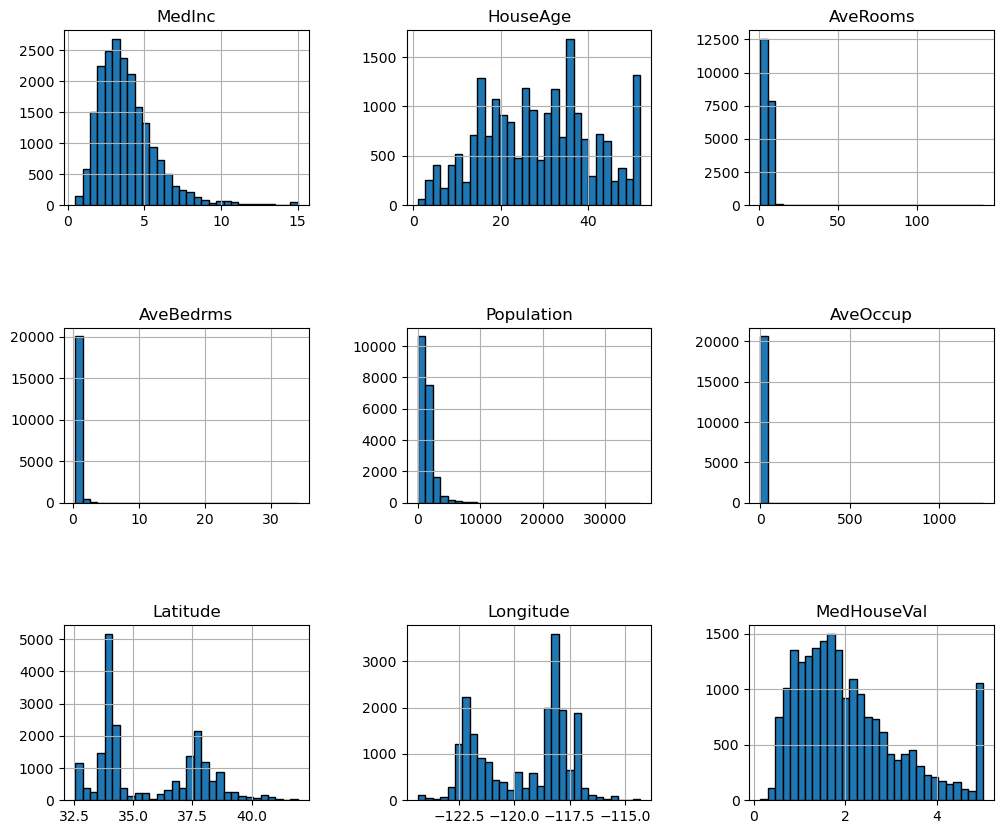

In [161]:
# Histogrammes des variables
df_raw.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

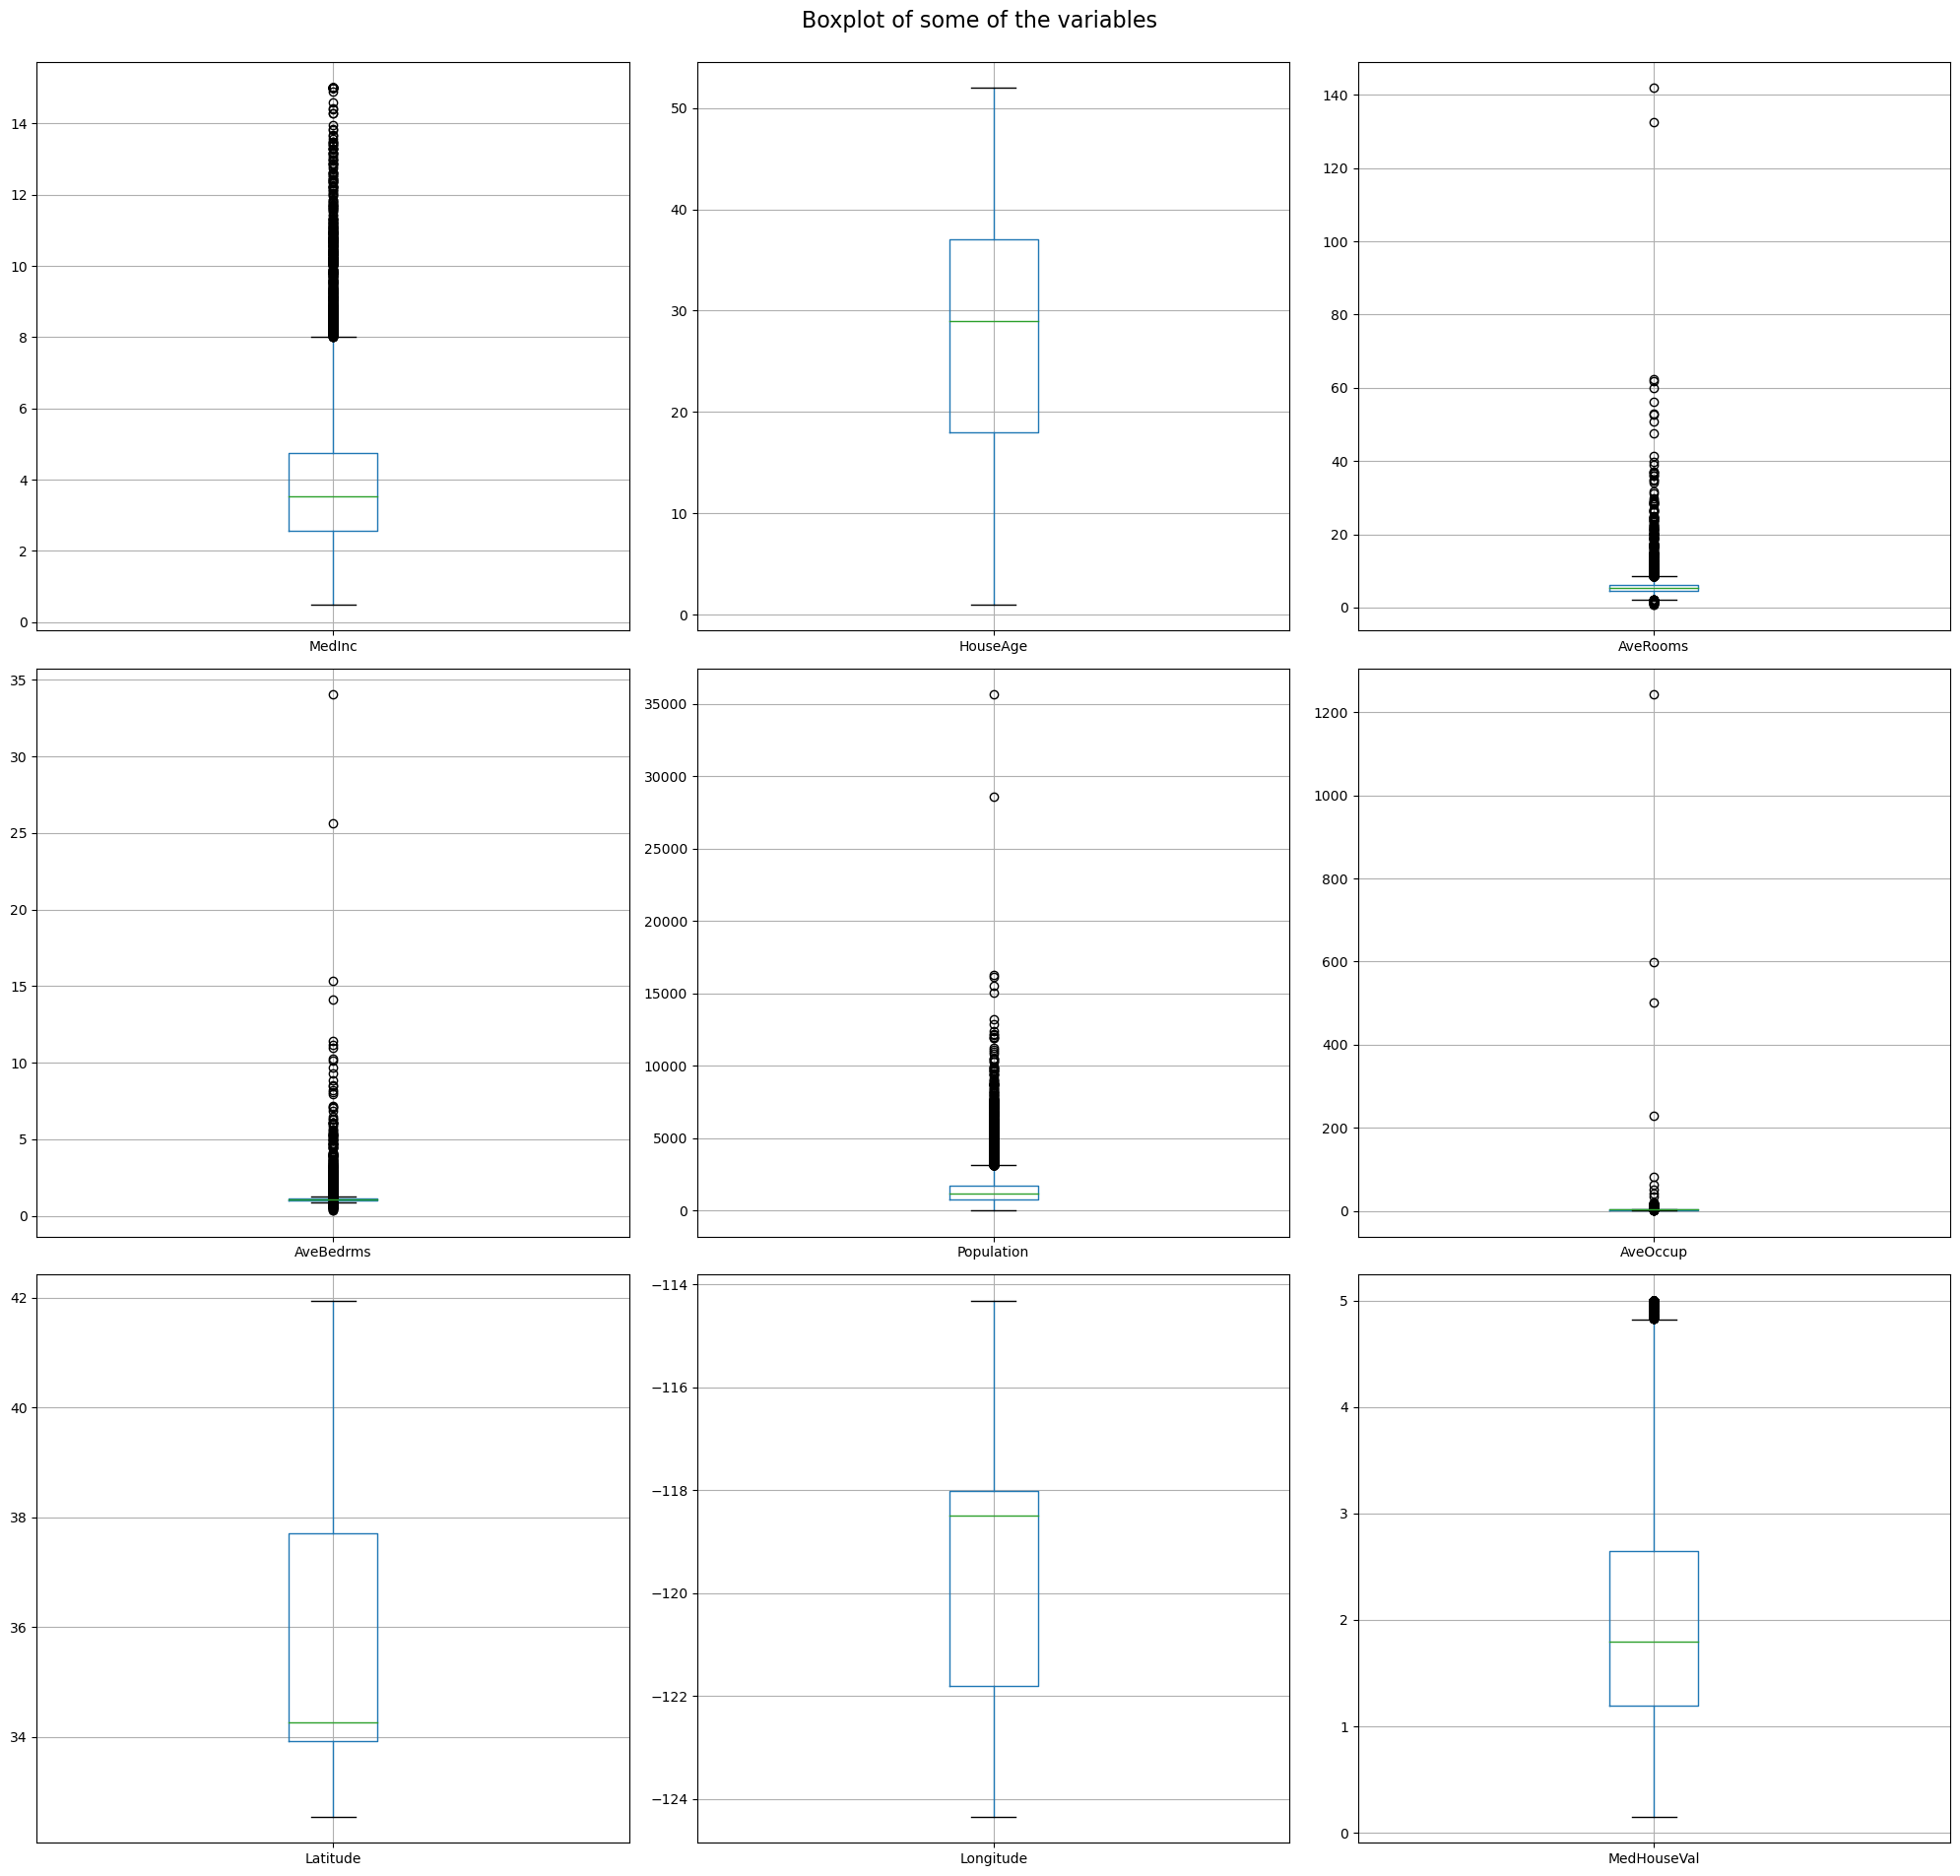

In [162]:
# Boxplot des variables

variables = df_raw.columns

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(variables):
    df_raw.boxplot(col, ax=axs[i])
    
fig.suptitle('Boxplot of some of the variables', fontsize=16)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

### Questions

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Commentez les graphiques ci-dessus. Que pouvez vous dire sur les valeurs extrêmes des variables "AveRooms", "Population" et "AveOccup" ? Qu'est-ce qu'un "block group" ?</p>

<p style="background-color:#AFEEEE;padding:3px">Note: Aidez-vous de la description des données obtenue plus haut. </p>

___
*Réponse:*

Les moyennes sont données par ménage. Un ménage étant un groupe de personne résidant dans une maison, lorsque la maison est vide (ex : résidance secondaire), les valeurs peuvent monter très vite en flèche et donner des valeurs excessivement élevé.


"Block group" est la manière dont on va regrouper les maisons par groupe d'îlots selon leurs FIPS. C'est une unité de mesure géographique qui permet l'échantillonnage.
___

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.1: </b> Points obtenus: /6
</div>

Remarques: 

### 1.2 Nettoyage des données

Pour avoir un meilleur aperçu des données, nous allons supprimer quelques observations extrêmes. Pour prédire le prix d'une maison à partir de données régionales, nous pouvons exclure les éléments sortants de l'ordinaire. Si vous le souhaitez, vous pouvez réafficher différents graphiques pour voir vos nouvelles données.

In [163]:
df = df_raw[(df_raw["AveRooms"] < 10) & (df_raw["Population"] < 20000)]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Combien de lignes ont été supprimées ? </p>

(2 point)

___
*Réponse:* 229 lignes ont été supprimées.
___

**Ho non ! Le code ci-dessous affiche un magnifique graphique mais on ne comprends rien au code !**

Complétez les commentaires "# -" du code ci-dessous pour que votre assistant puisse enfin comprendre le code qu'il a copié sur [scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).  Aidez-vous de la documentation si nécessaire mais gardez les descriptions simples. Quelques mots suffisent, pas besoin de grande phrases.

(10 points)

In [164]:
# - Permet de générer un aléatoire
rng = np.random.RandomState(0)

# - Retourne 10'000 éléments aléatoires dans la range de la dimension (0-20'410) du tableau df
indices = rng.choice(np.arange(df.shape[0]), 
                     size=10000,
                     replace=False)

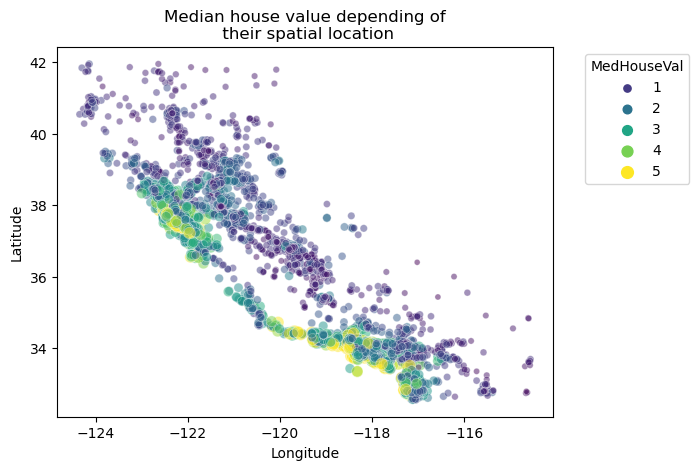

In [165]:
# - Création du Scatterplot avec ses arguments
sns.scatterplot(
    data=df.iloc[indices],                         # - On recherche les éléments contenues dans indices à la ligne dans le df de base pour les attribuer à data
    x="Longitude", y="Latitude",                   # - Colonnes de "data" utilisées pour les axes x et y
    size="MedHouseVal",                            # - La taille des cercles est basé sur la valeur MedHouseVal
    hue="MedHouseVal",                             # - C'est ce qui lie les 2 arguments suivants aux valeurs de MedHouseVal
    palette="viridis",                             # - Couleur utilisé par le scatterplot
    alpha=0.5)                                     # - Opacité des points

# - Titre de la légende et du Scatterplot ainsi que l'emplacement de la légende
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Si vous n'êtes pas familier avec la Californie, allez jeter un coup d'oeil sur Google maps. Que pouvez-vous observer concernant le prix median des maisons ?</p>

(2 points)

___
*Réponse:* Il y a une grosse montée de prix à Los Angeles et vers San Francisco. Le reste des villes/villages il y a beaucoup de maison à des prix classé 1 ou 2.
___

On crée maintenant un joli pairplot à l'aide de Seaborn:

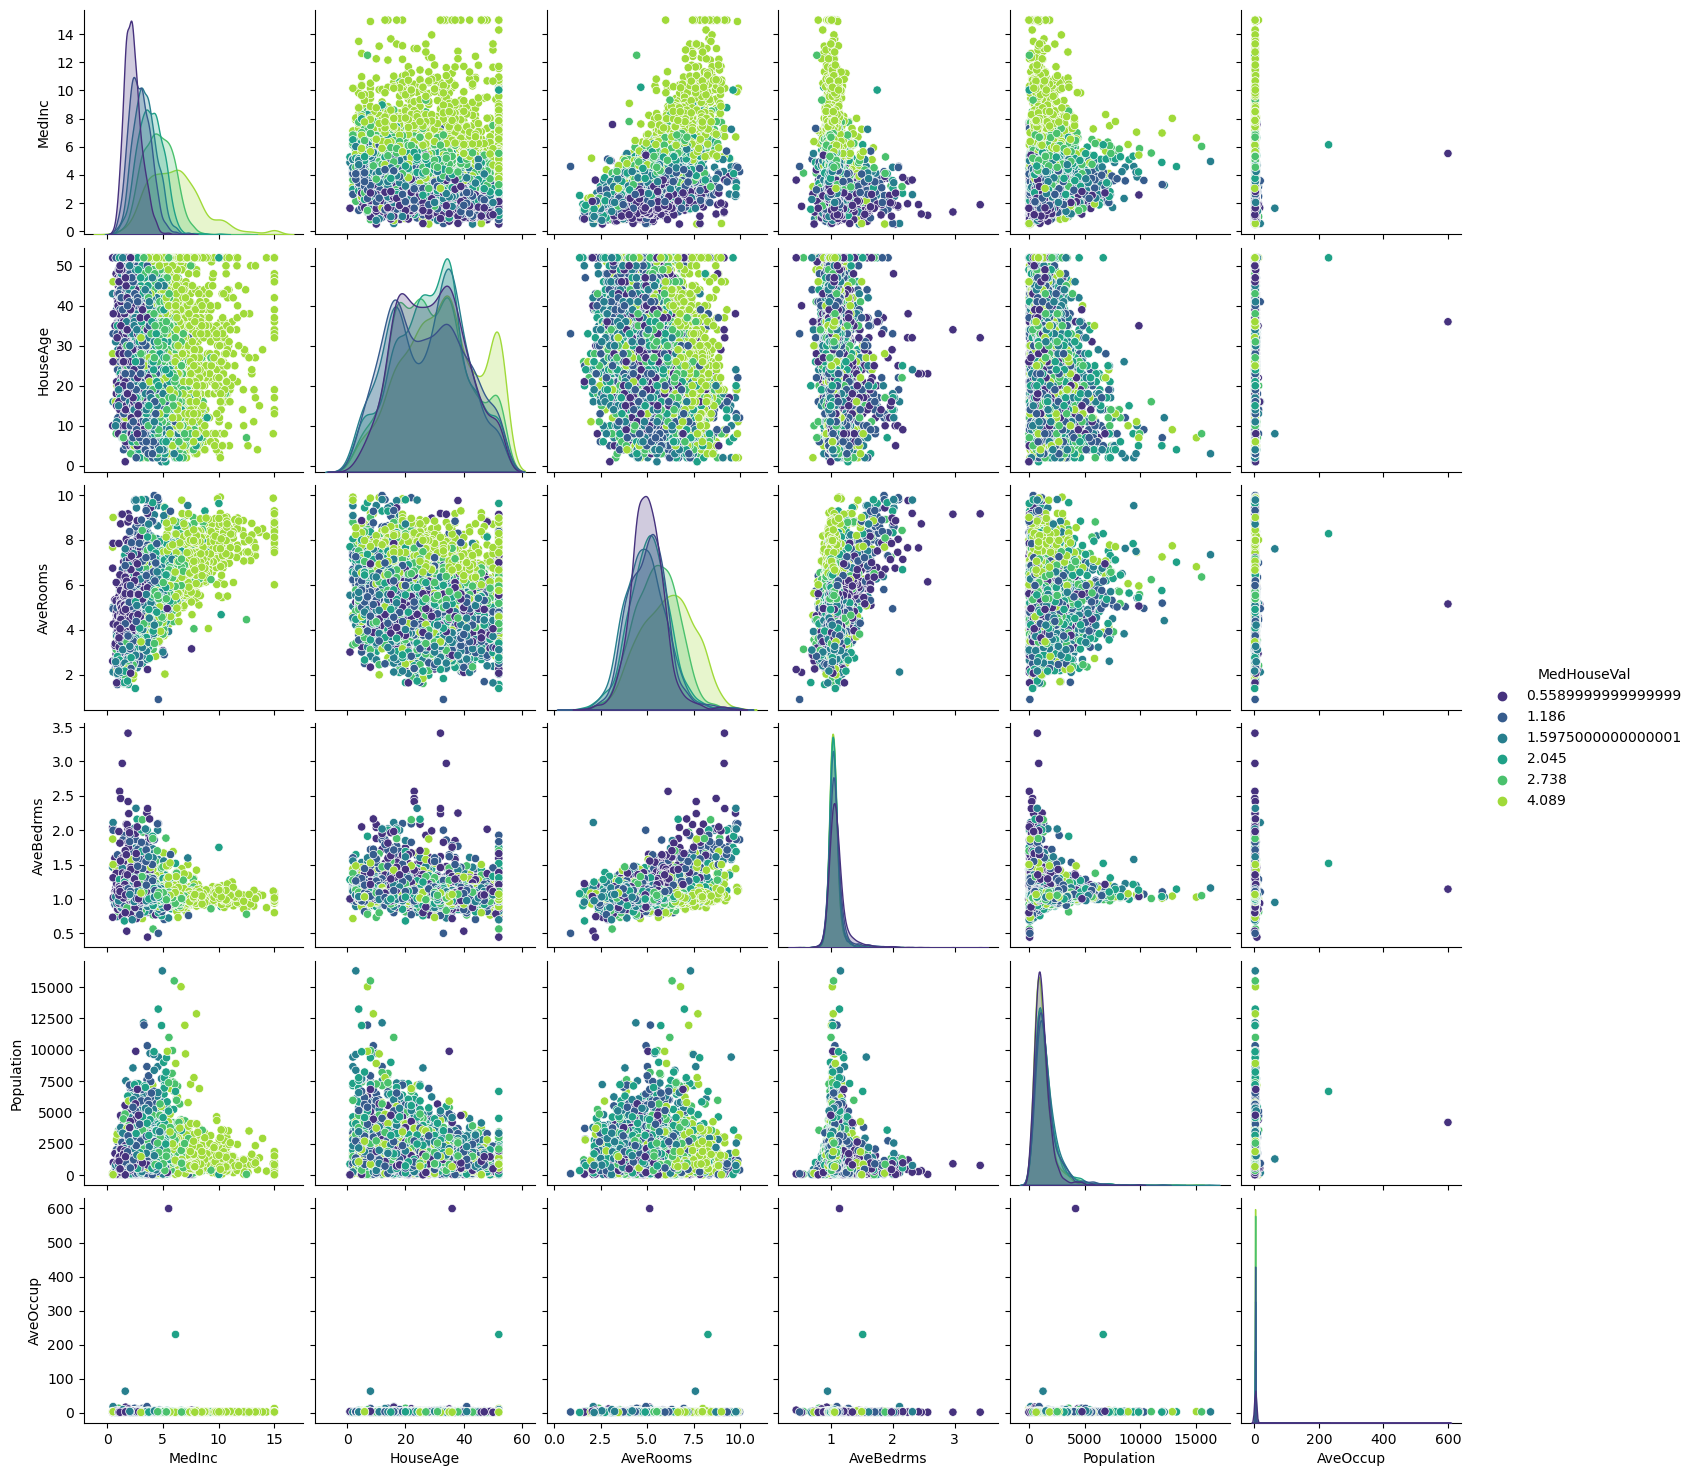

In [166]:
# Inutile de garder ces deux colonnes
columns_drop = ["Longitude", "Latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)

# Ignorez ce petit passage un peu complexe, c'est pour avoir 6 couleurs pour une variable continue. 
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

### 1.3 Interprétation et analyse des graphiques

Dans la partie suivante, nous essayerons de prédire la variable MedHouseVal en fonction des autres variables, une à une. Observez les différents graphiques réalisés dans cette analyse exploratoire. 

(6 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quelles variables pourraient être de bons prédicteurs ? Ou de mauvais ? Ajouteriez-vous un ou plusieurs autre graphiques pour visualiser les données ? Justifiez vos réponses.</p>

___
*Réponse:* Le revenue moyen par block group "MedInc" est un très bon prédicteur. "HouseAge" et AveRooms sont moins bon mais pourrait être utilisé. "AveBedrms", "Population" et "AveOccup" sont de très mauvais prédicteurs. Il n'y a pas besoin d'ajouter un ou plusieurs graphiques car ceux-ci sont déjà suffisemment lisible. Il serait intéressant en revanche d'avoir d'autre graphique de bonne qualité comme MedInc et pas seulement celui-ci.
___ 

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.2-1.3: </b> Points obtenus: /20
</div>

Remarques: 

## Exercice 2: Régression linéaire simple

<div class="alert alert-block alert-warning">
<b>Attention: </b> la régression linéaire dans cet exercice peut prendre environ 5 minutes avec les hyper-paramètres actuels. 
</div>

Maintenant que vous êtes familiarisés avec la base de données, vous allez utiliser l'algorithme de régression linéaire simple vu en classe. 

Si vous voulez revoir comment fonctionne la régression linéaire d'une manière plus vidéastique, je vous conseille [cette vidéo de StatQuest](https://www.youtube.com/watch?v=nk2CQITm_eo) qui revoit étape par étape le fonctionnement de la régression simple et de l'ajustement d'une ligne aux données, de $ R^2 $ et de la régression multiple (en Anglais simple et clair mais quand même en 25 minutes, les premières 10 minutes suffisent). [Cette vidéo](https://www.youtube.com/watch?v=PaFPbb66DxQ) vous résume en moins de temps le concept qui va être utilisé dans le code ci-dessous: comment ajuster une ligne aux données. 






### 2.1 Complétez les commentaires

(6 points)

**Les troix méthodes ci-dessous: "*compute_MSE*", "*step_gradient*" et "*gradient_descent*" n'ont pas de commentaire d'entête.** Complétez les en indiquant ce que fait la fonction et pourquoi, ce que l'on a comme paramètres et ce qu'elle retourne. Vous pouvez vous inspirer des commentaires des fonctions d'après pour le format. 

___

*Répondre directement dans le code ci-après, entre les guillemets:*

In [167]:
def compute_MSE(b,m,data):
    """
    Permet de calculer et retourner l'erreur du modèle (MSE = Mean Squared Error)
    """
    totalError = 0
    # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    """
    Méthode de descente en gradient (collecte de données, dérivée, MàJ des paramètres du modèle)
    """
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    """
    Suite de la méthode de descente en gradient ()
    """
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b,m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b,m]






### 2.2 Pearson

(5 points)

Pour calculer le score $R^2$ on peut utiliser la fonction *r2_score()* fourni par scikit-learn ou l'écrire nous-même. Pour la beauté du geste, et quelques points bien sûr, **complétez la fonction ci-dessous pour calculer le coefficient $R^2$ (aussi appelé coeficient de Pearson).** 

Pour être certain que votre code fonctionne, vous pouvez exécuter la cellule de TEST qui comparera les résultats de votre méthode avec ceux de la méthode préfaite de sklearn. 



In [179]:
def pearson(y, y_pred):
    """
    On calcule la moyenne et récupère la somme de l'erreur (E1) ainsi que la somme de chaque valeur - la moyenne (E2).
    Puis on calcule r2 avec 1 - sumE1 / sumE2.
    """
    # - Complétez le code et le commentaire d'entête pour calculer le coefficient de Pearson ici. - 
    # - (n'oubliez pas de changer la valeur de retour !)
    mean = 0
    sumE1 = 0
    sumE2 = 0
    
    for i in y:
        mean += i
    mean = mean / len(y)
    
    
    for i in range(len(y)):
        E1 = y[i] - y_pred[i]
        sumE1 += E1 * E1
        E2 = y[i] - mean
        sumE2 += E2 * E2
        
    r2 = 1 - sumE1 / sumE2
    
        
            
    
    
    return r2

**Test**

Comparaison entre votre fonction et celle de scikit-learn. 

In [180]:
# TEST - Affiche un message en cas de réussite / échec de la méthode "pearson()"

y = np.random.randint(20, size=10)
y_pred = np.random.randint(20, size=10)

if (pearson(y, y_pred) == r2_score(y, y_pred)): 
    print(f"RÉUSSITE - La fonction pearson() donne le résultat attendu.")
else:
    print(f"ÉCHEC - Il semble qu'il y ait une erreur et que votre fonction ne donne pas les bons résultats.")

RÉUSSITE - La fonction pearson() donne le résultat attendu.


<div class="alert alert-block alert-info">
<b>Corrections 2.1 - 2.2: </b> Points obtenus: /11
</div>

Remarques: 

### 2.3 Exécution du code vu en cours

Le code ci-dessous est simplement un joli packaging  du code vu en cours. 

In [170]:


def score_simple_linear_regression(df: pd.DataFrame, var: str, lr: float, n_epochs: int, label: str = 'MedHouseVal', n_repetitions: int = 100) -> tuple:
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the California dataset.
    var : str
        Variable to use as feature.
    label : str, default 'MedHouseVal'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
        
    Returns
    -------
    Tuple
        (Mean score, list of labels, list of predictions, best m, best b)
    """
    scores = []
    labels = []
    predictions = []
    
    data = df[[var, label]].values
    
    ms = []
    bs = []
    
    for _ in range(n_repetitions):
        train, test = train_test_split(data, test_size=0.2)
        # Initialize m and b.
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        # Step 4: gradient descent
        [b, m] = gradient_descent(train, initial_b, initial_m, lr, n_epochs)
        preds = test[:, 0] * m + b
        lbls = [test[i, 1] for i in range(len(test))]
        ms.append(m)
        bs.append(b)
        
        # Inversez le commentaire ci-dessous pour utiliser la méthode de sklearn.
        scores.append(r2_score(lbls, preds))
        #scores.append(pearson(lbls, preds))
        
        labels += lbls
        predictions += list(preds)
    
    best_idx = scores.index(max(scores))
    
    return np.mean(scores), labels, predictions, ms[best_idx], bs[best_idx]

def plot_regression_line(data: np.ndarray, x_name: str, y_name: str, m: float, b: float, title: str) -> plt.axes:
    """
    Plot the regression line usimg the given `m` and `b`.
    
    Parameters
    ----------
    data : np.ndarray
        Data with the variable and the label to plot. 
        Label must be in the last column.
    x_name : str
        Name of the column for x.
    y_name : str
        Name of the column for y.
    m : float
        m value to use for the predictions.
    b : float
        b value to use for the predictions.
    title : str
        Title of the plot.
        
    Returns
    -------
    plt.axes
        Matplotlib ax. 
    """
    fig, ax = plt.subplots(figsize=(15, 9))
    data.plot.scatter(x=x_name, y=y_name, ax=ax, title=title)
    y_pred = m * data[x_name] + b
    ax.plot(data[x_name].values, y_pred, 'r')
    ax.text(0.025, 0.925,
            f'$R^2={np.round(r2_score(data[y_name].values, y_pred), 3)}$',
            fontsize=12, transform=ax.transAxes)
    return ax

Si vous n'avez pas réussi à écrire une fonction **pearson()**, (de)commentez les lignes indiquées dans la fonction "*score_simple_linear_regression()*" ci-dessus afin d'utiliser la méthode de sklearn. 


Comme vu dans le labo précédent, il vaut souvent mieux normaliser/standardiser les données (moyenne nulle et écart-type à 1). Ça n'est pas toujours le cas et ça peut être discutable. Ici nous allons normaliser les variables indépendantes que nous voulons utiliser pour la régression linéaire simple. 

*Tip: n'oubliez pas que vous pouvez développer ou réduire la sortie de l'exécution d'une cellule en cliquant sur la gauche de la cellule. Comme la sortie de la cellule suivante est relativement longue, la réduire pour ne pas scroller pendant trop longtemps peut être utile!*



Variables testées pour la régression linéaire simple: ['MedInc', 'AveRooms', 'Population']
Variable MedInc
Learning rate: 0.5


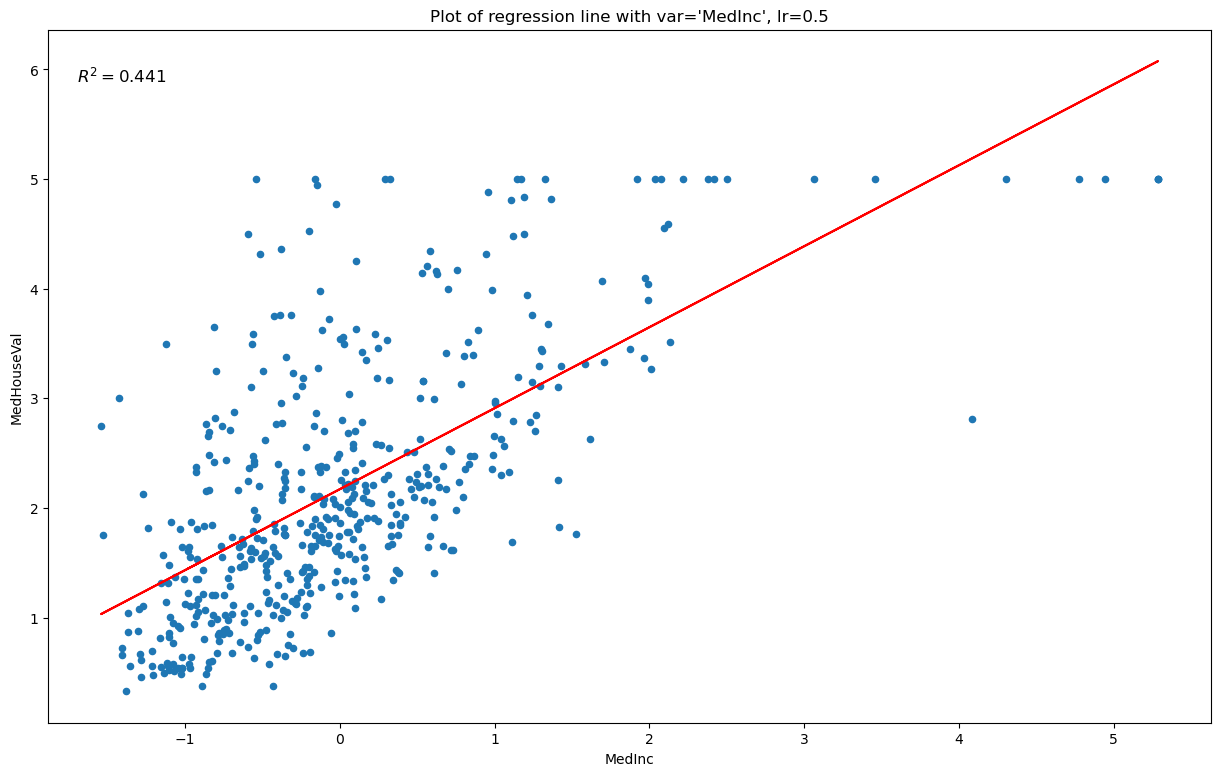

Learning rate: 0.1


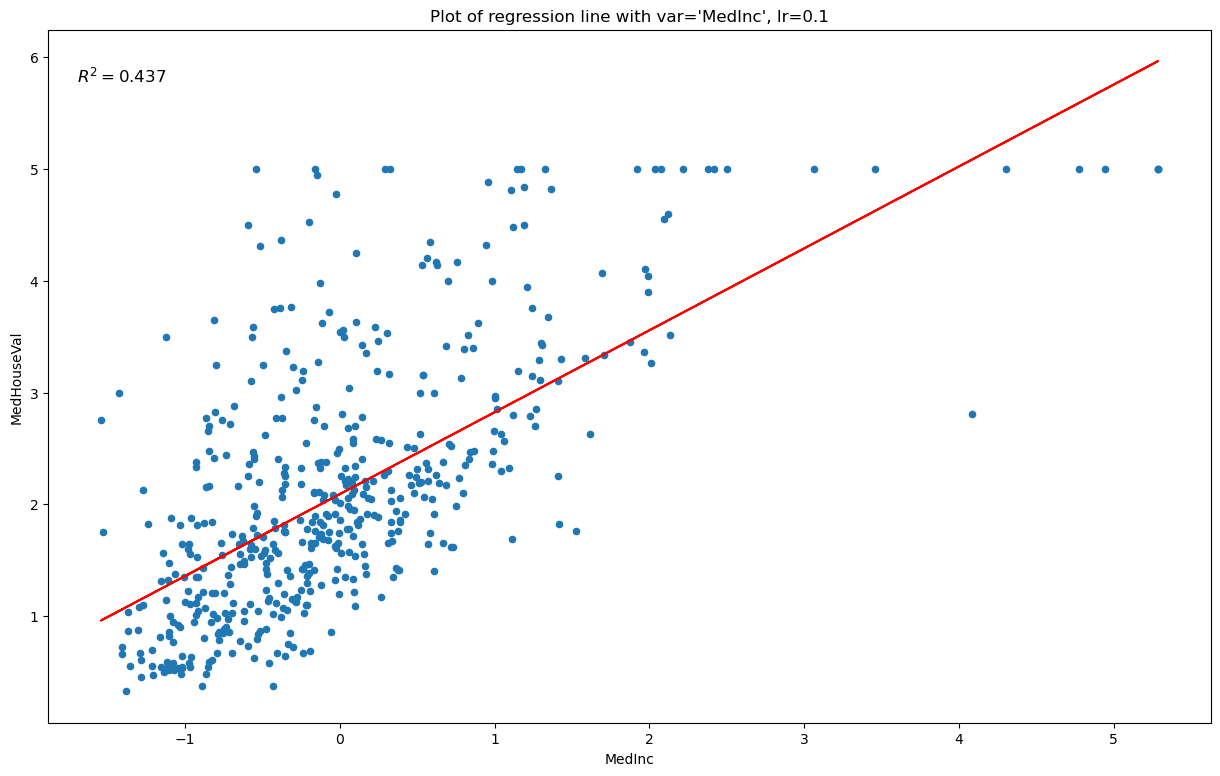

Learning rate: 0.01


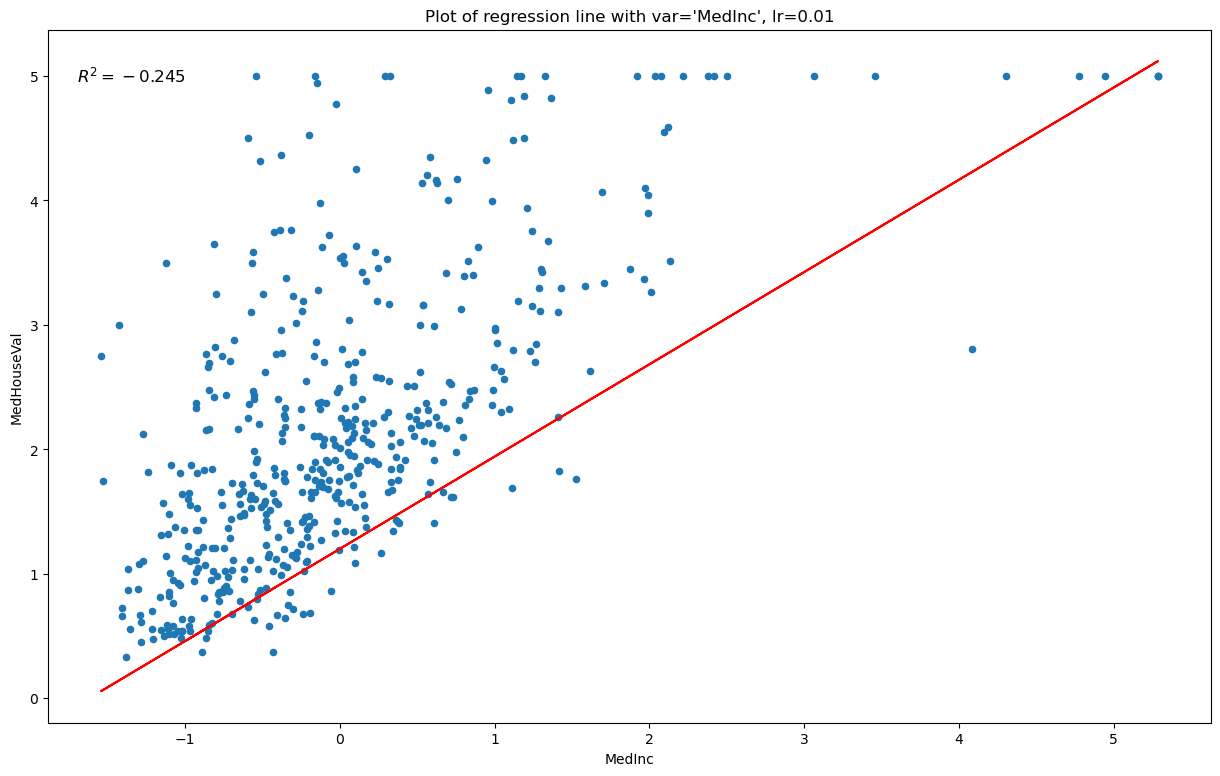

Learning rate: 0.001


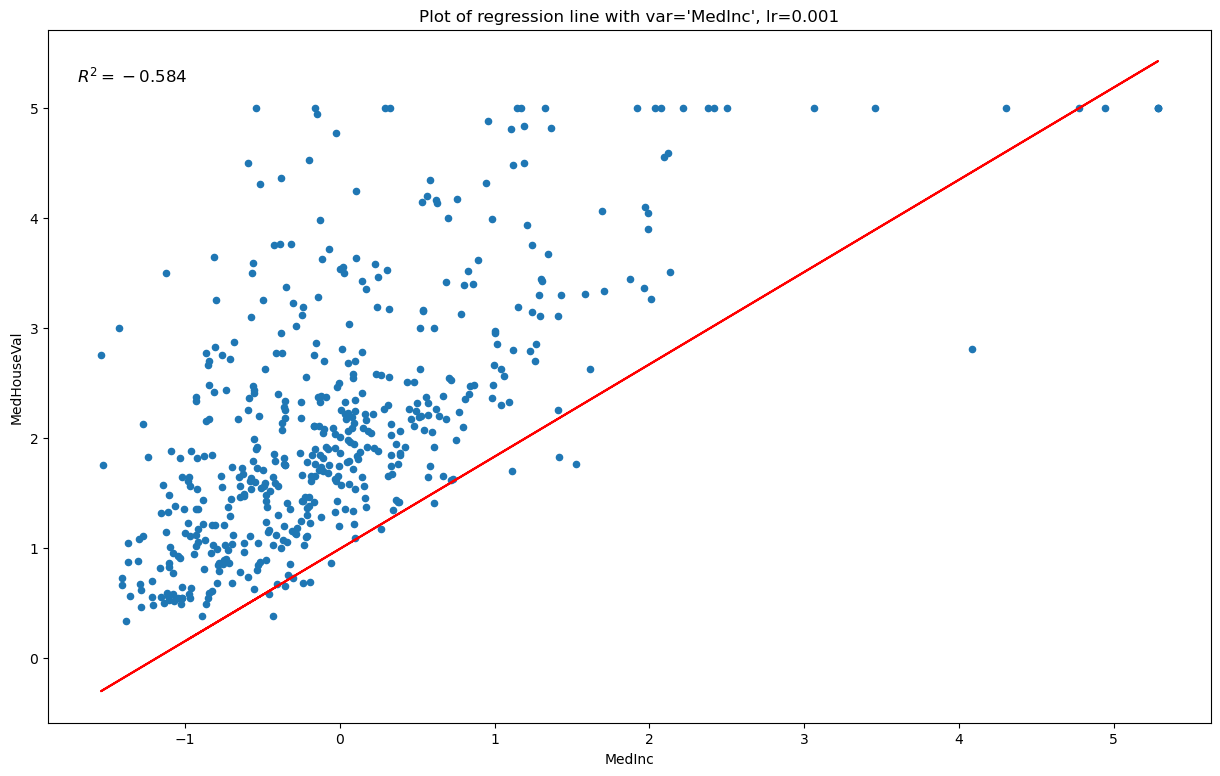

Variable AveRooms
Learning rate: 0.5


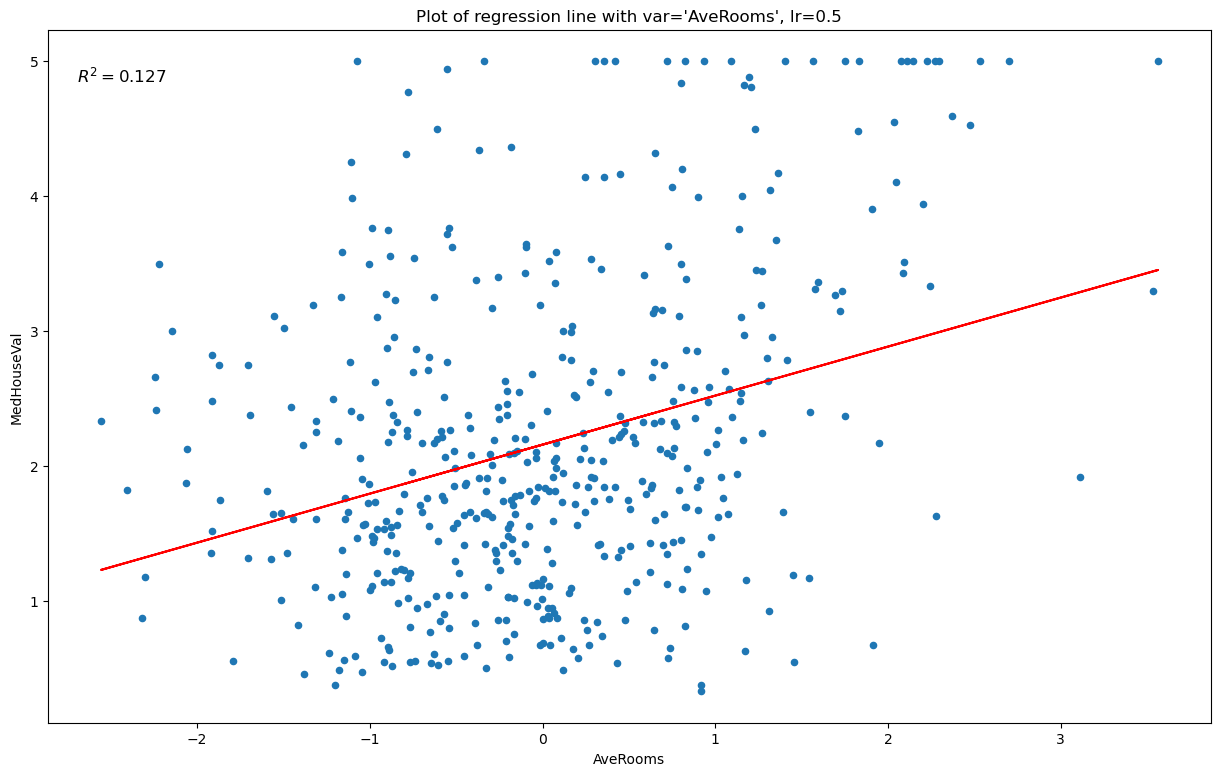

Learning rate: 0.1


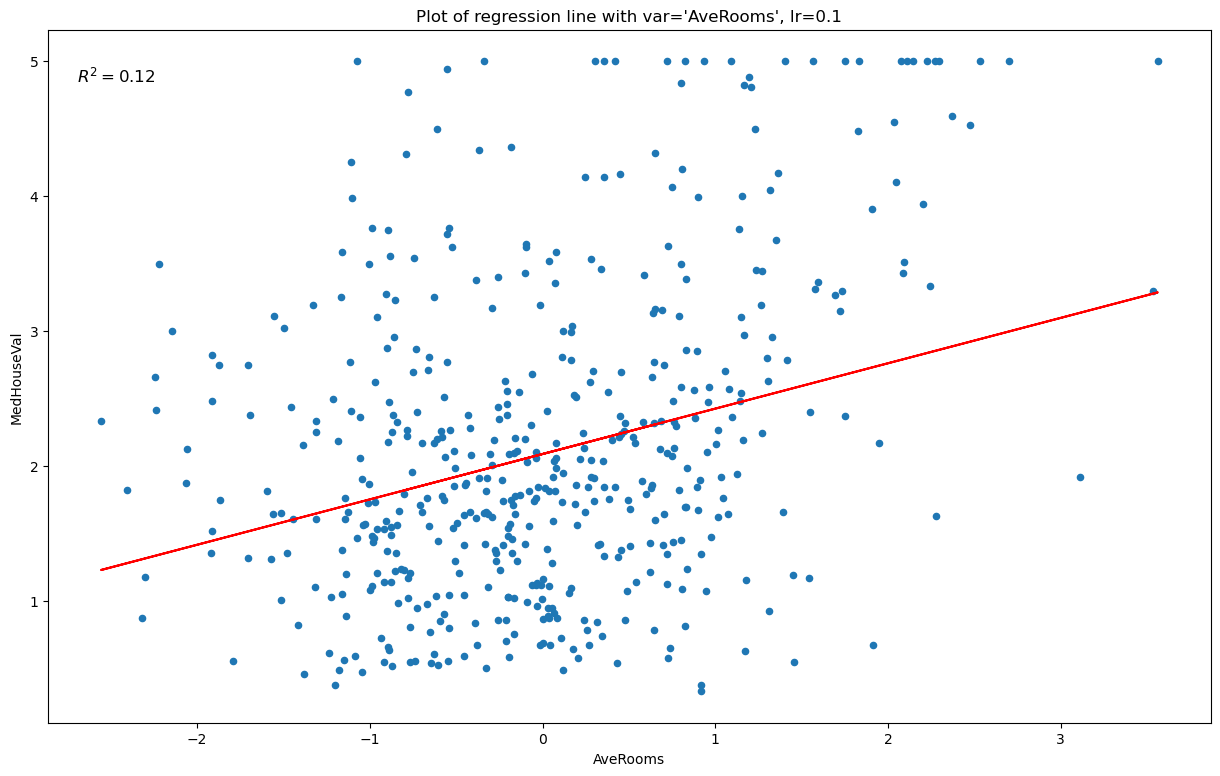

Learning rate: 0.01


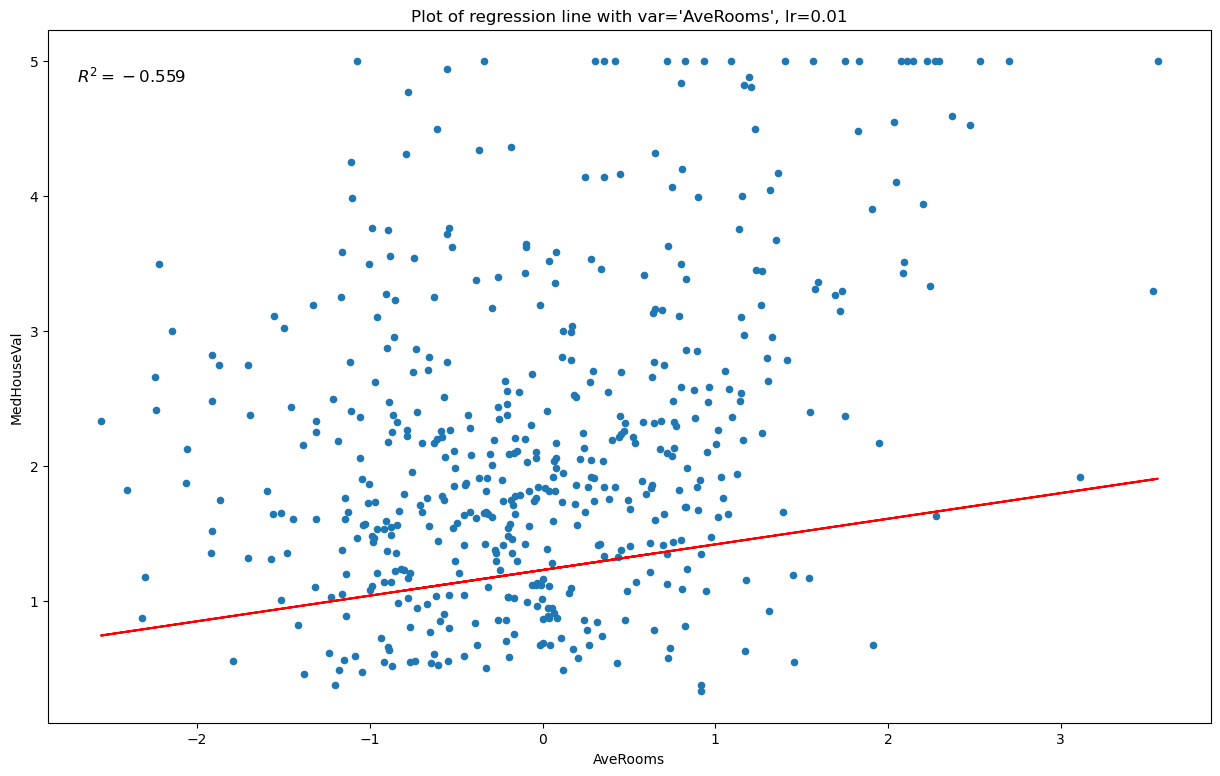

Learning rate: 0.001


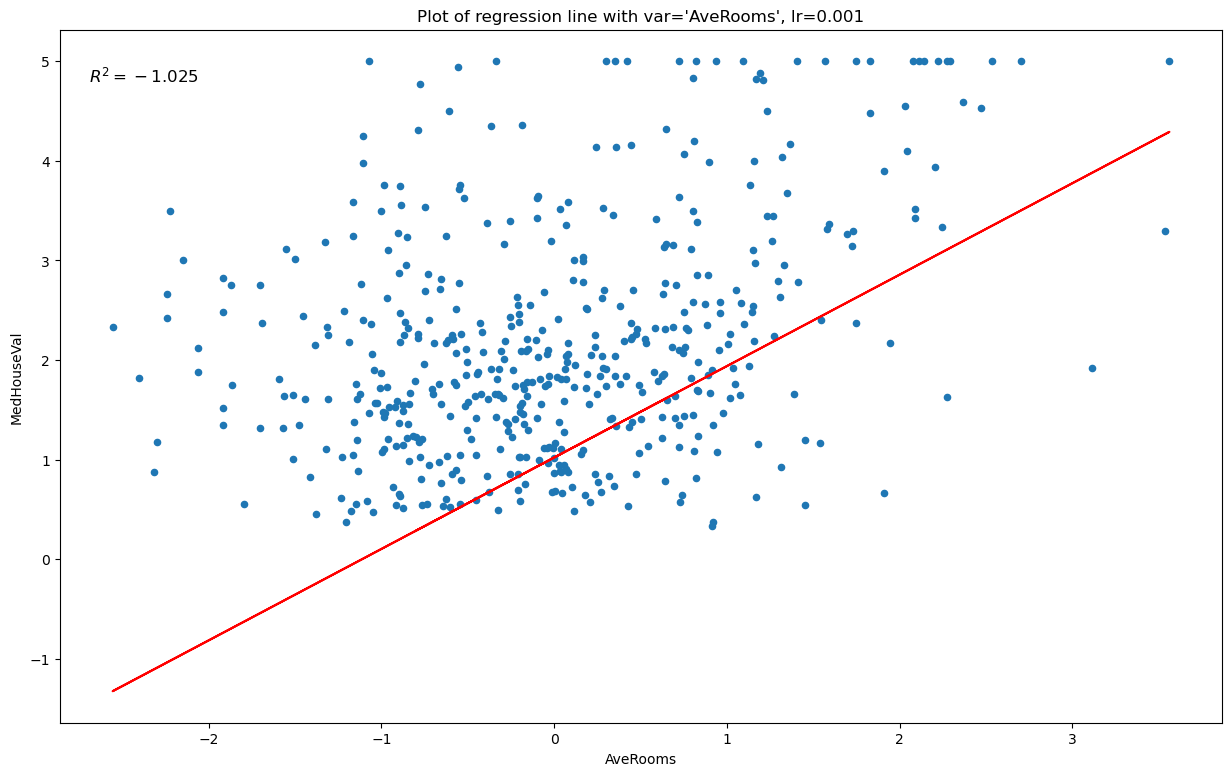

Variable Population
Learning rate: 0.5


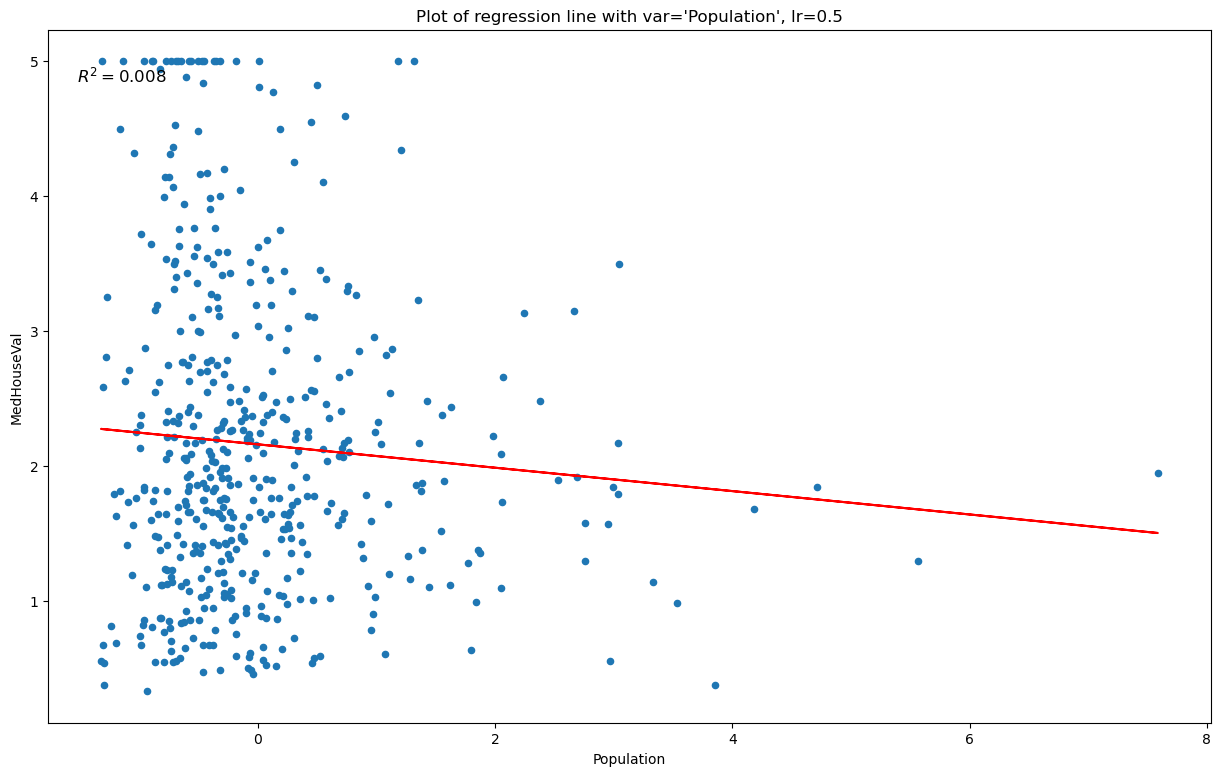

Learning rate: 0.1


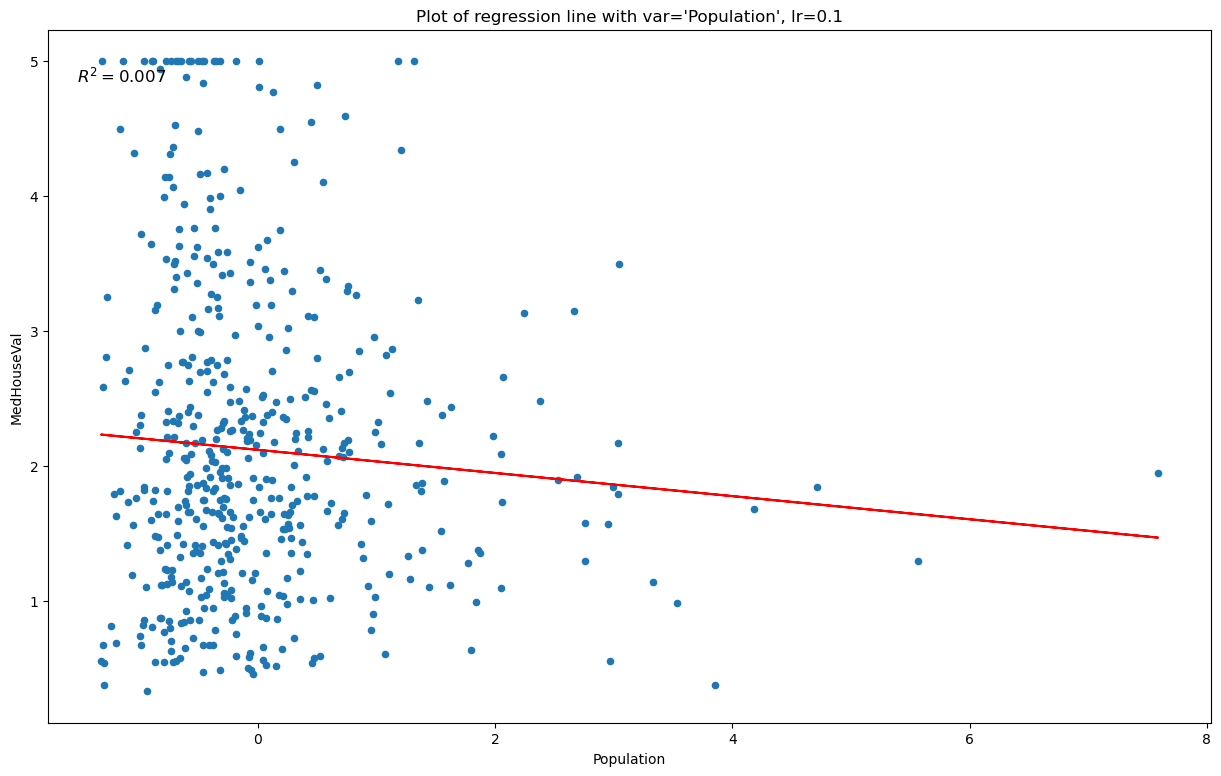

Learning rate: 0.01


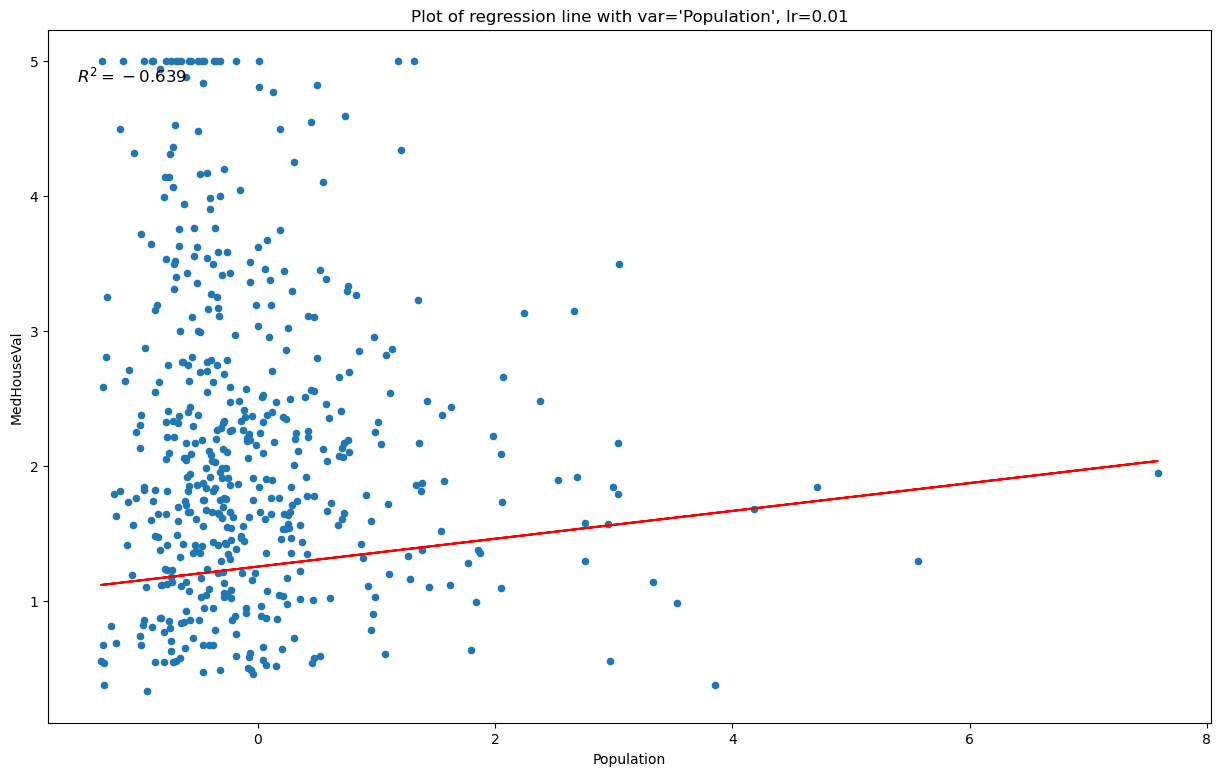

Learning rate: 0.001


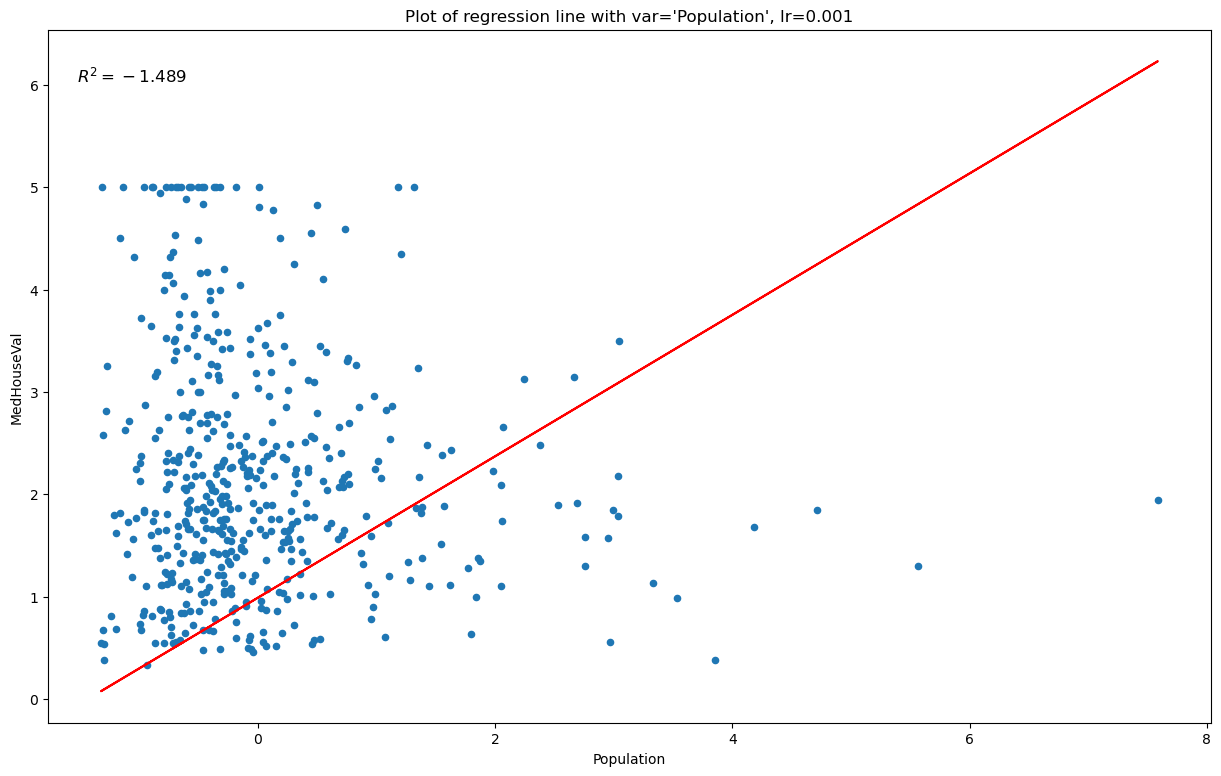

Exécution: 88.94773387908936 secondes


In [171]:
import time

# Mesure du temps au début
start = time.time()


# On va prendre un subset du dataframe, avec sa taille on en aurait pour 1h de calcul à chaque fois.
indices = rng.choice(np.arange(df.shape[0]), 
                     size=500,
                     replace=False)
subset_df = df.iloc[indices]

# Standardisation

# Copie de l'échantillon et normalisation des colonnes choisies (toutes sauf MedHouseVal)
df_normalized = subset_df.copy()
cols = subset_df.columns[df.columns != 'MedHouseVal']
scaler = StandardScaler()

df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

variables = ['MedInc',
             'AveRooms',
             'Population']


print(f"Variables testées pour la régression linéaire simple: {variables}") 
label = 'MedHouseVal'

learning_rates = [0.5, 0.1, 0.01, 0.001]
n_epochs = 30
scores = {}

for var in variables:
    print(f"Variable {var}")
    scores[var] = {}
    for lr in learning_rates:
        print(f"Learning rate: {lr}")
        score, _, _, m, b = score_simple_linear_regression(df_normalized, var, lr, n_epochs, label=label)
        scores[var][lr] = score
        plot_regression_line(df_normalized, var, 'MedHouseVal', m, b, f'Plot of regression line with {var=}, {lr=}')
        plt.show()

end = time.time()
print(f"Exécution: {end - start} secondes")

### 2.4 Question

(5 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quel est le meilleur score que vous obtenez et que signifie-t-il (qu'est-ce que $R^2$) ?</p>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quels sont les risques en choisissant un learning rate trop petit ou trop grand ?</p>


___

*Réponse:*

Le meilleur score obtenu avec la méthode sklearn est 0.475. Cela signifie qu'il y a 0.525 de résidu et que ce n'est donc pas parfait mais que l'on obtient tout de même un résultat intéressant.

Si le learning rate est trop petit : Il faut beaucoup de temps pour arriver au minimum.
Si le learning rate est trop grand : On peut tourner autour du minimum voir diverger.


___

<div class="alert alert-block alert-info">
<b>Corrections 2.4: </b> Points obtenus: /2
</div>

Remarques: 

___
___

## Exercice 3: Régression linéaire multiple



Lorsqu'on utilise plus d'une variable pour la régression, il est important d'avoir une idée de la [corrélation](https://en.wikipedia.org/wiki/Correlation) entre lesdites variables. Ci-dessous, on affiche la matrice de corrélation qui montre pour chaque variable, à quel point elle est corrélée avec les autres. On veut éviter de prendre deux variables corrélées entre elles car cela peut poser des problèmes (sujet pas abordé ici). 

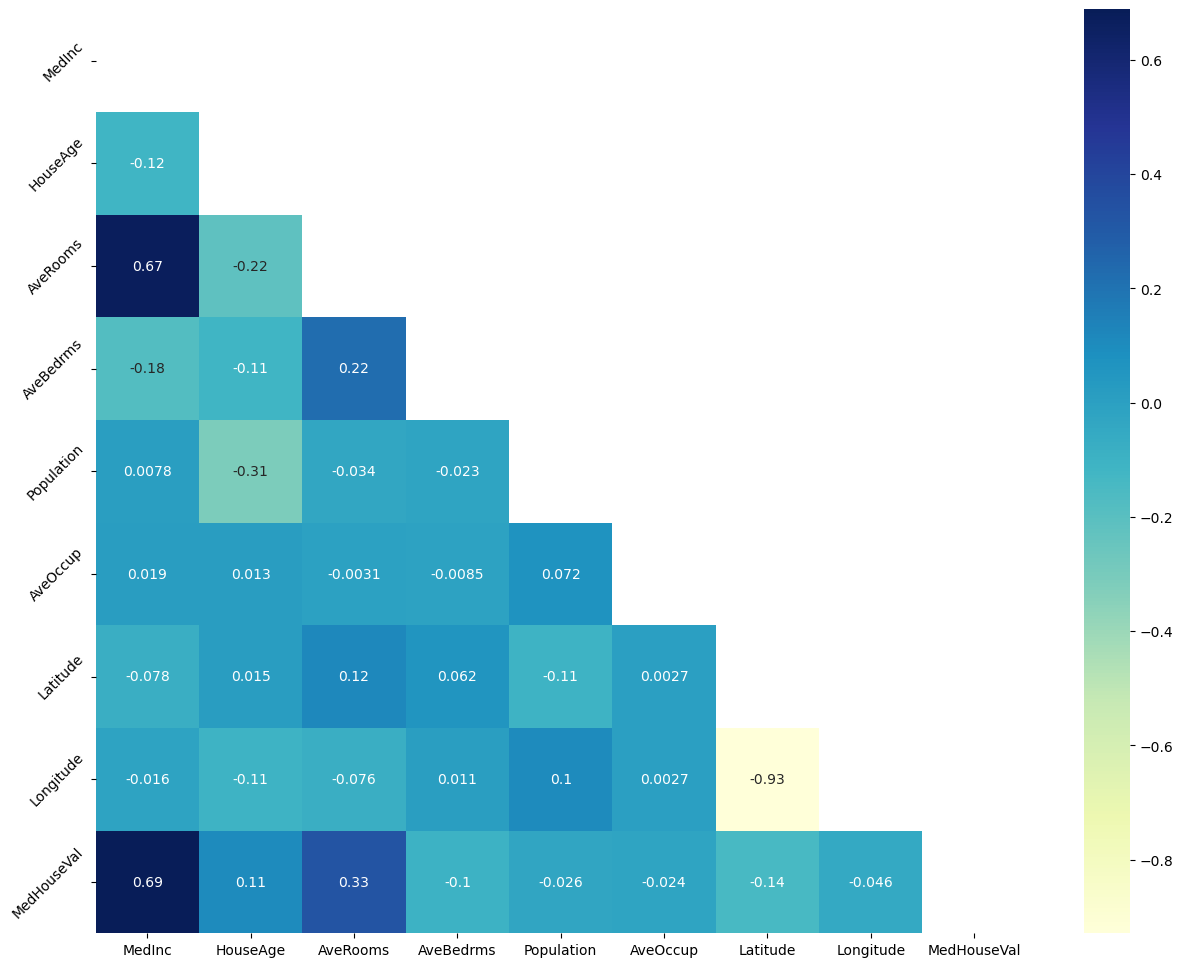

In [172]:
# Heatmap de la matrice de corrélation.

# Masque pour la partie supérieure de la matrice, qui est symétrique. 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Figure et plot
fig, ax = plt.subplots(figsize=(15,12)) 
dataplot = sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.yticks(rotation=45) 
plt.show()

### 3.1 Question

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelles variables sont fortement ($> 0.1$) corrélées entre elles ? Est-ce que ces corrélations ont toutes un sens ? Développez.</p>

___



*Réponse:*

Variables fortement corréles :
- Medinc et MedHouseVal
- HouseAge et MedHouseVal
- AveRooms et MedHouseVal
- AveRooms et Latitude
- AveRooms et AveBedrms
- MedInc et AveRooms

La majorité ont une sens mais pas toute. Par exemple, le nombre de chambres n'a aucun lien avec la latitude de la maison. En revanche, cela semble logique que l'âge de la maison soit en lien avec la valeur médianne de la maison



___

### 3.2 Régression

Exécutez les cellules ci-dessous.



In [173]:
# Version sklearn

def score_linear_regression(df: pd.DataFrame, *var: str, label: str = 'MedHouseVal', n_repetitions: int = 100):
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the boston dataset.
    var : Tuple of str
        Tuple with the variables to use as feature.
    label : str, default 'MEDV'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
    """
    scores = []
    labels = []
    predictions = []
    
    for _ in range(n_repetitions):
        regressor = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(df[list(var)], df[label], test_size=0.2)
        regressor.fit(X_train, y_train)
        labels.append(y_test)
        predictions.append(regressor.predict(X_test))
        scores.append(regressor.score(X_test, y_test))
    return np.mean(scores), labels, predictions

On choisit ensuite les groupes de variables non-corrélées entre elles que nous allons tester.


In [174]:

combos = [['Latitude', 'Longitude'], 
          ['AveRooms', 'Population', 'MedInc'],
          ['AveRooms', 'Population'], 
          ['AveRooms', 'MedInc'], 
          ['Population', 'MedInc']]

label = 'MedHouseVal'



Puis nous réalisons la régression linéaire multiple avec chaque groupe en utilisant notre fonction créée ci-dessus. 

In [175]:
for variables in combos:
    print(f'Model using {variables}')
    score, y_true, y_pred = score_linear_regression(df_normalized, *variables, label=label)
    print(f'Score={score}')
    #ax = utils.plot_true_vs_pred(y_true, y_pred, title=f'Predicted vs Actual ({variables})', with_identity=True)
    #utils.set_thousands_separator(ax, which='both', nb_decimals=0)
    #plt.show()

Model using ['Latitude', 'Longitude']
Score=0.20926156844614746
Model using ['AveRooms', 'Population', 'MedInc']
Score=0.439813104785178
Model using ['AveRooms', 'Population']
Score=0.11553528391225663
Model using ['AveRooms', 'MedInc']
Score=0.4453233543206452
Model using ['Population', 'MedInc']
Score=0.4369923236417376


### Questions

(2 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Cela prend-il beaucoup de temps en comparaison avec notre fonction "maison" pour la régression linéaire simple ?</p>



*Réponse:* Non, cette fonction est beaucoup plus rapide

___

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quel groupe de variables permet de prédire au mieux la variable dépendante ? Quels résultats obtenez-vous ?</p>

*Réponse:* On obtient les meilleurs résultats avec les variables AveRooms et MedInc avec environ 0.48 de score. Si l'on rajoute la variable population, les résultats sont légérement moins bon en moyenne. 


___

<div class="alert alert-block alert-info">
<b>Corrections 3: </b> Points obtenus: /5
</div>

Remarques: 

Si vous faites ce labo avant les fêtes, exécutez la cellule ci-dessous. 

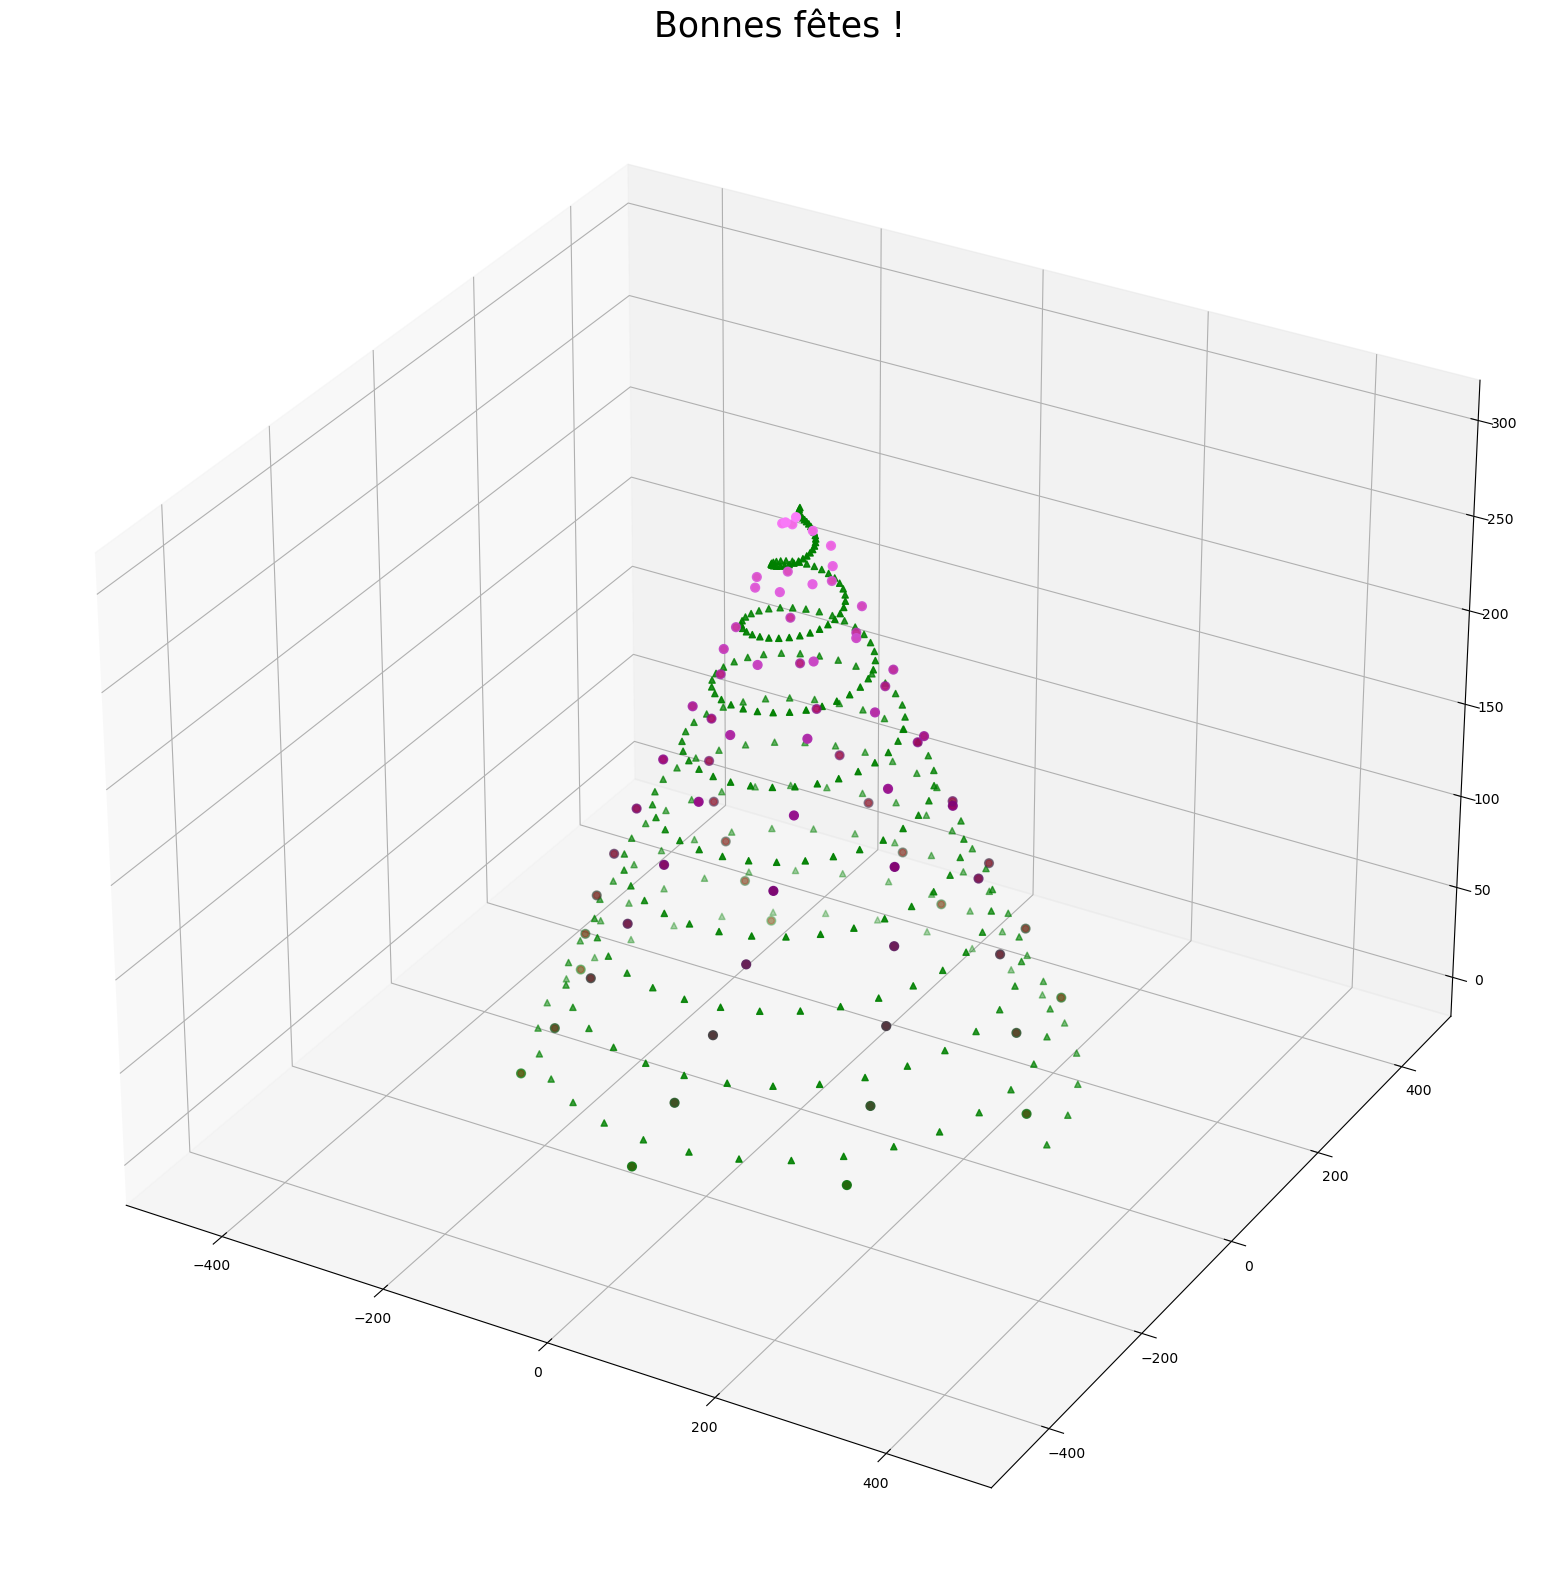

In [176]:
# Code goulûment copié de: 
# https://medium.com/analytics-vidhya/how-to-draw-a-3d-christmas-tree-with-matplotlib-aabb9bc27864

import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection="3d")

k=300
Z = [i for i in range(k)]
X = [math.cos(i/5)*(k-i) for i in range(k)]
Y = [math.sin(i/5)*(k-i) for i in range(k)]
ax.scatter(X,Y,Z, c="green", marker="^")
k=300
step = 4
Z = [i for i in range(1,k,step)]
X = [math.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
Y = [math.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c="red", marker="o")

c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c=c, marker="o",s=40)


plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("Bonnes fêtes !", {'fontsize': 25})
plt.show()

